<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matías Villalón</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub.

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub.

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [ ]:
# MatiBVG
# https://github.com/MatiBVG/EIE401.git

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2}
$$

$$
f(z) =  ysin(x)
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

-2


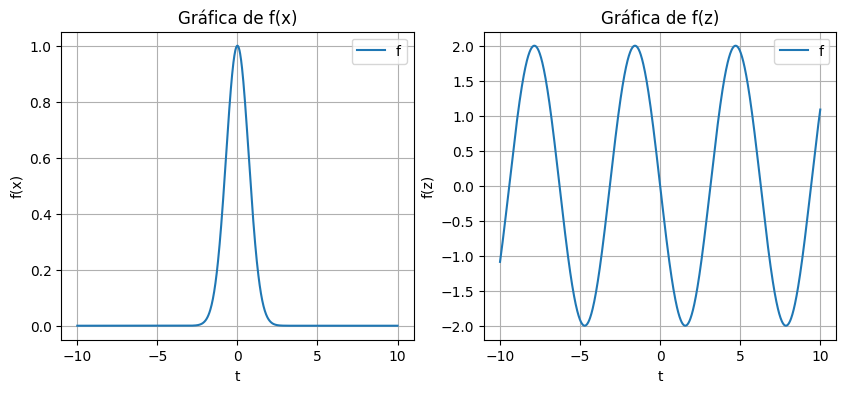

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Elegimos el rango de la variable x, en este caso elijo desde -10 hasta 10 para
#observar el comportamiento tanto en numeros positivos como negativos
#Utilizando 1000 puntos para evitar problemas de una incorrecta lectura
x = np.linspace(-10,10,1000)

#Defino "y" de forma que varie el valor utilizado al momento del ejercicio solo
#por ocio propio y realizo print al valor que usa y en la grafica actual
y = np.random.randint(-2, 2)
print(y)

#Funciones
f_x = np.exp(-x**2) #Define la función f(x)
f_z = y*np.sin(x) #Define la funcion f(z)


#Graficas
#Grafica de f(x)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, f_x)
plt.xlabel("t")
plt.ylabel("f(x)")
plt.title("Gráfica de f(x)")
plt.legend("f(x)")
plt.grid()
#Grafica de f(z)
plt.subplot(1, 2, 2)
plt.plot(x, f_z)
plt.xlabel("t")
plt.ylabel("f(z)")
plt.title("Gráfica de f(z)")
plt.legend("f(z)")
plt.grid()
plt.show()






## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


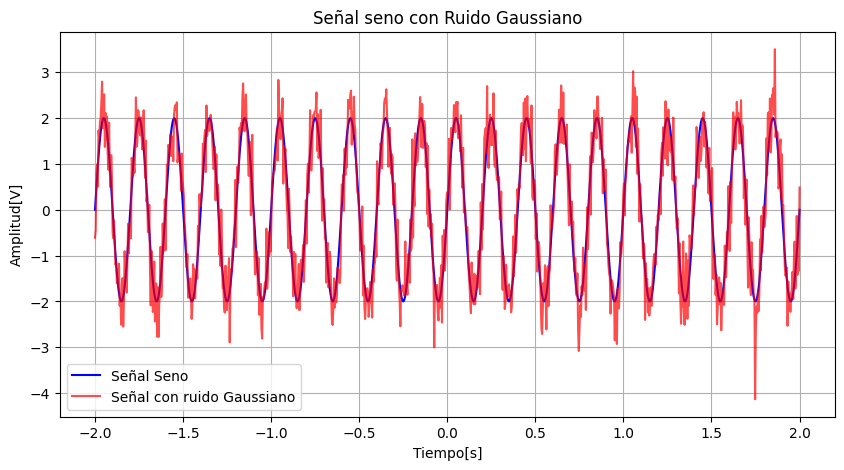

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos nuevamente el rango de nuestra señal
t = np.linspace(-2, 2, 1000) #1000 puntos desde -2 a 2

#Creamos la señal seno
A = 2 #Amplitud de la señal
f = 5 #Frecuencia en Hz
señalSeno = A*np.sin(2* np.pi *f*t)#La forma de señal Amplitud*sen(frecuencia*tiempo)

#Creamos señal de ruido Gaussiano
ruido = np.random.normal(0, 0.5, t.shape)  #random.normal trabaja con distribución gaussiana, definimos media 0 con desviación 0.5
#.shape ajusta el tamaño de ruido para coincidir con la variable t


#Señal con ruido Gaussiano
señalRuido = señalSeno + ruido

#Grafica de las señales
plt.figure(figsize=(10, 5))
plt.plot(t, señalSeno, label="Señal Seno", color='b')
plt.plot(t, señalRuido, label="Señal con ruido Gaussiano", color='r', alpha=0.7)
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.title("Señal seno con Ruido Gaussiano")
plt.legend()
plt.grid()
plt.show()

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

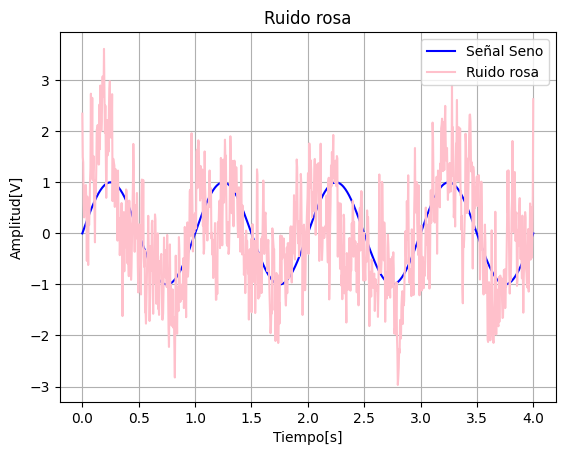

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#Traemos al proyecto el codigo de las referencias dejadas por el profesor sobre el ruido rosa
def noise_psd(N, psd=lambda f: 1):
    X_white = np.fft.rfft(np.random.randn(N))
    S = psd(np.fft.rfftfreq(N))
    S = S / np.sqrt(np.mean(S**2))
    X_shaped = X_white * S
    return np.fft.irfft(X_shaped)

def pink_noise(f):
    return 1 / np.where(f == 0, float('inf'), np.sqrt(f))  #Se usa 1/sqrt(f) para ruido rosa, por lo que es un valor decreciente según la frecuencia

#Parámetros de las señales
N = 1000  #Numero de muestras
t = np.linspace(0, 4, N)  #Tiempo de 4 segundos con 1000 muestras


#Creamos la señal seno
A = 1 #Amplitud de la señal
f = 1 #Frecuencia en Hz
señalSeno = A*np.sin(2* np.pi *f*t)#La forma de señal Amplitud*sen(frecuencia*tiempo)

#Creamos ruido rosa
ruidoRosa = noise_psd(N, pink_noise)
rosaSen = ruidoRosa + señalSeno

#Finalmente el plot
plt.figure()
plt.plot(t, señalSeno, label="Señal Seno", color='b')
plt.plot(t, rosaSen, label="Ruido rosa", color="pink")#Ajustamos el color para denotar el ruido rosa
plt.title("Ruido rosa")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.grid()
plt.legend()
plt.show()

#Los resultados obtenidos sobre el ruido rosa y el ruido Gaussiano demuestran que el ruido Gaussiano sigue una distribución mas simetrica
#a comparación del ruido rosa, esto debido a que se configura con media 0 y varianza de 0.5 respecto a la señal senosoidal, además
#de que claramente se aprecia que el ruido rosa se mueve de forma más aleatoria y suele alejarse más de la señal.
#También hay que destacar que el ruido rosa disminuye a frecuencias altas , esto se puede comprobar aumentando los valores de f








## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a